Objective
Decision Tree & Random Forest 
We are going to predict once again if a passenger on the Titanic is going to survive or not using decision trees and random forests this time: 

1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(change at least two parameters), 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use random forest then change the number of estimators

6. Calculate the new accuracy and compare it with the previous result.
 

# 1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('titanic-passengers.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
df.shape

(891, 12)

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [6]:
# Drop rows that has missing values 
df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket', 'Fare'], axis=1, inplace=True) 

In [7]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [12]:
df = pd.get_dummies(data=df, columns=['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch'], drop_first=True)

In [13]:
df.head(2)

,Survived,Age,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,No,28.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,No,25.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df['Survived'] = df['Survived'].map({
    'Yes': 1,
    'No' : 0
})

## Dealing with missing variables

In [15]:
df.isna().sum()

Survived        0
Age           177
Sex_male        0
Pclass_2        0
Pclass_3        0
Embarked_Q      0
Embarked_S      0
SibSp_1         0
SibSp_2         0
SibSp_3         0
SibSp_4         0
SibSp_5         0
SibSp_8         0
Parch_1         0
Parch_2         0
Parch_3         0
Parch_4         0
Parch_5         0
Parch_6         0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imputer = SimpleImputer(strategy='mean')

In [21]:
cols = X_train.columns
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(imputer.transform(X_test), columns=cols)

## Specifying the dependent and independent variables

In [19]:
# target (y) , features(X)
y = df['Survived'].values
X = df.iloc[:,1:]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2, stratify=y, shuffle=True)

In [22]:
clf = DecisionTreeClassifier(random_state = 10)

In [23]:
# Training model
clf.fit(X_train, y_train.reshape(-1, 1).ravel())

DecisionTreeClassifier(random_state=10)

In [24]:
# accuracy score
print(clf.score(X_train, y_train))

0.9353932584269663


## Checking model performance

In [25]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [26]:
y_pred = clf.predict(X_test)

In [27]:
aC = accuracy_score(y_pred=y_pred, y_true=y_test)
aC

0.8156424581005587

In [28]:
cR = classification_report(y_pred=y_pred, y_true=y_test)
print(cR)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       110
           1       0.75      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [29]:
cV = cross_val_score(DecisionTreeClassifier(random_state = 10), X_train, y_train.reshape(-1,1).ravel(), 
                     cv=4, scoring='accuracy')

In [30]:
cV.mean()

0.776685393258427

In [31]:
pred2= clf.predict(X_train)

In [32]:
accuracy = accuracy_score(y_pred=pred2, y_true=y_train)
accuracy

0.9353932584269663

# 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

In [34]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [36]:
decision_tree = DecisionTreeClassifier(random_state = 10) 
decision_tree.fit(X_train, y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.54

In [37]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


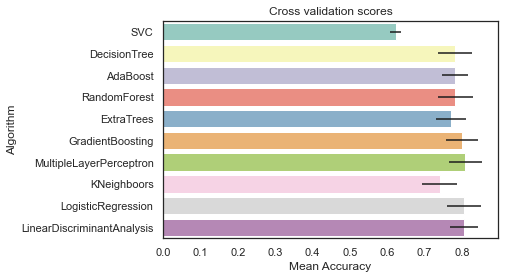

In [38]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


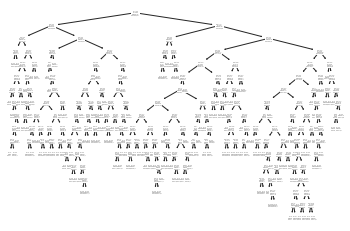

In [42]:
from sklearn import tree
tree.plot_tree(clf, max_depth=None, feature_names=None, class_names=None, 
                       label='all', filled=False, impurity=True, node_ids=False, 
                       proportion=False, rotate='deprecated', rounded=False, precision=3, ax=None, fontsize=None)
plt.show()

In [44]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=764605f7e5098a8b3f935f0af92c34fe15b050a79b99f7fdac95c8ac83f6eace
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [47]:
!pip install --upgrade scikit-learn==0.20.3

  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\user\anaconda3\lib\site-packages\scikit_learn-0.24.2.dist-info\
   from C:\Users\user\anaconda3\Lib\site-packages\~cikit_learn-0.24.2.dist-info
  Moving to c:\users\user\anaconda3\lib\site-packages\sklearn\
   from C:\Users\user\anaconda3\Lib\site-packages\~-learn


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\user\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-5w0ka5q2\\scikit-learn\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-5w0ka5q2\\scikit-learn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\user\AppData\Local\Temp\pip-wheel-mxfli0mf'
       cwd: C:\Users\user\AppData\Local\Temp\pip-install-5w0ka5q2\scikit-learn\
  Complete output (678 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:/Users/user/anaconda3\\Library\\lib']
    NOT AVAILABLE
  
  blis

In [46]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [48]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

NameError: name 'feature_cols' is not defined

# 3. Change the decision tree parameters(change at least two parameters), 

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# 4. Calculate the new accuracy and compare it with the previous results. 

In [50]:
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.54

# 5. Use random forest then change the number of estimators

In [52]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest= round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

93.54

In [ ]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 200, 2)

# 6. Calculate the new accuracy and compare it with the previous result.

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.